#### 수면 중 스트레스 정도 예측

#### feature
- sr(snoring_rate): 수면 중 코골이의 속도 또는 강도, 어떤 단위 또는 규모로 측정될 수 있습니다  
- rr(respiration_rate): 수면 중 분당 취해진 호흡의 수  
- t(body_temperature): 수면 중 사용자의 체온으로, 섭씨 또는 화씨로 측정될 수 있습니다  
- lm(limb_movement): 수면 중 사지 운동의 속도 또는 강도로, 그 사람이 얼마나 활동적이거나 불안정한지를 나타냅니다  
- bo(blood_oxygen): 수면 중 혈액에 존재하는 산소의 양을 나타내는 혈중 산소 농도입니다  
- rem(eye_movement): 수면 중 안구 운동 활동으로, 수면 중 급격한 안구 운동(REM) 단계를 나타낼 수 있습니다  
- sr.1(sleeping_hours): 특정 수면 시간 동안 잠을 잔 시간입니다  
- hr(heart_rate): 수면 중 분당 심장 박동 수, 전반적인 건강 및 수면의 질과 관련된 필수 생리학적 매개 변수  

#### target
- sl(stress_level): 수면 중 스트레스 정도를 나타내는 목표 변수로 다음과 같이 구분됩니다

In [65]:
import pandas as pd

s_df = pd.read_csv('./datasets/stress_in_sleep.csv')
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [66]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [67]:
s_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [68]:
s_df.duplicated().sum()

0

In [69]:
s_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sr,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
rr,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
t,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
lm,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
bo,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
rem,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sr.1,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
hr,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
sl,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


In [70]:
corr = s_df.corr()
corr[['sl']].sort_values(by='sl', ascending=False)[1:]

,sl
sr,0.975322
lm,0.971071
hr,0.963516
rr,0.963516
rem,0.951988
bo,-0.961092
t,-0.962354
sr.1,-0.973036


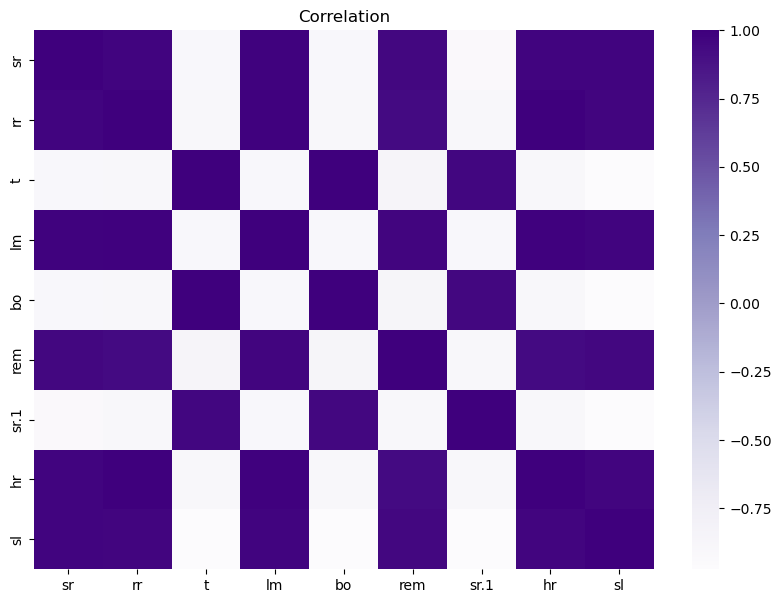

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

각 컬럼이 타겟데이터와 양의상관, 음의 상관관계가 매우 높게 나타남을 확인  

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

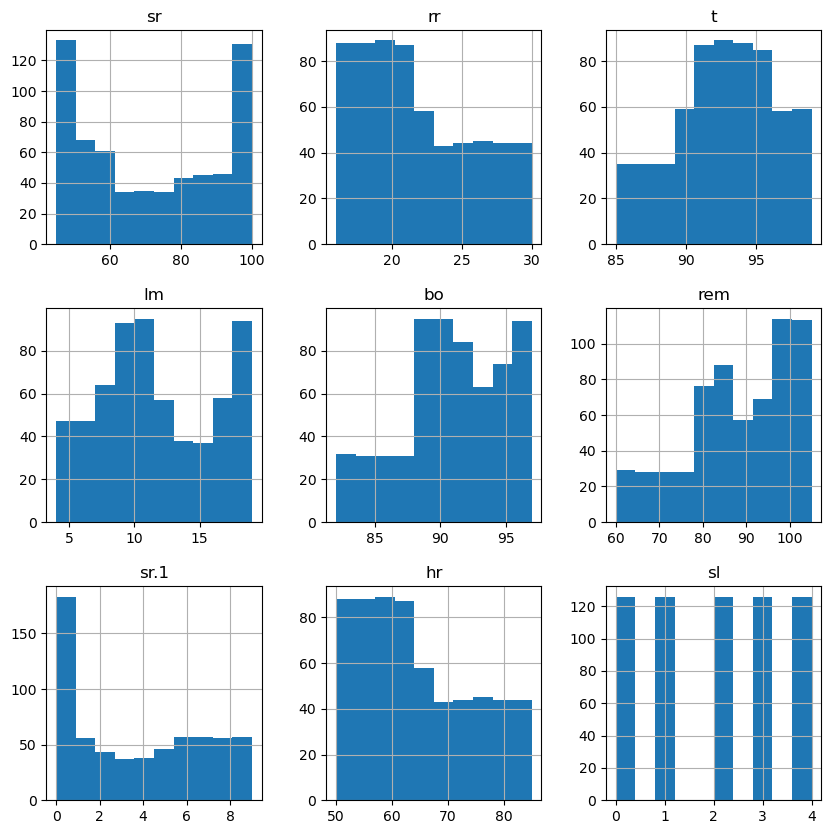

In [72]:
s_df.hist(figsize=(10,10))

이상치 제거 진행 후에 다시 확인하기로 결정

In [73]:
std_s_df = s_df.copy()

In [74]:
std_s_df.sl.value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

매우 고르게 나타남.

In [75]:
corr[['sl']].sort_values(by='sl', ascending=False)[1:]

,sl
sr,0.975322
lm,0.971071
hr,0.963516
rr,0.963516
rem,0.951988
bo,-0.961092
t,-0.962354
sr.1,-0.973036


In [76]:
from sklearn.preprocessing import StandardScaler

features = s_df.iloc[:, :-1]

std = StandardScaler()
std_features=  std.fit_transform(features)
std_s_df = pd.DataFrame(std_features, columns = features.columns)
std_s_df['target'] = s_df.sl
std_s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,target
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
625,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
626,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
627,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
628,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [77]:
features

,sr,rr,t,lm,bo,rem,sr.1,hr
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [78]:
columns = ['sr', 'lm', 'hr','rr','rem','bo','t','sr.1']

for column in columns:
    print(f'{column}: {std_s_df[~std_s_df[column].between(-1.96, 1.96)].shape[0]}건')

sr: 0건
lm: 0건
hr: 14건
rr: 14건
rem: 33건
bo: 27건
t: 23건
sr.1: 0건


In [79]:
columns = ['sr', 'lm', 'hr','rr','rem','bo','t','sr.1']

for column in columns:
    std_s_df.drop(
        std_s_df[~std_s_df[column].between(-1.96, 1.96)].index,
        axis=0,
        inplace=True
    )

In [80]:
columns = ['sr', 'lm', 'hr','rr','rem','bo','t','sr.1']

for column in columns:
    print(f'{column}: {std_s_df[~std_s_df[column].between(-1.96, 1.96)].shape[0]}건')

sr: 0건
lm: 0건
hr: 0건
rr: 0건
rem: 0건
bo: 0건
t: 0건
sr.1: 0건


In [81]:
s_df_1 = s_df.copy()

In [82]:
s_df_1 = s_df_1.iloc[std_s_df.index].reset_index(drop=True)
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
551,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
552,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
553,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
554,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [83]:
s_df_1.sl.value_counts()

sl
3    126
1    126
2    126
0     93
4     85
Name: count, dtype: int64

이상치 제거후 타겟 데이터 분포 이상 확인

1. 언더 샘플링 진행

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

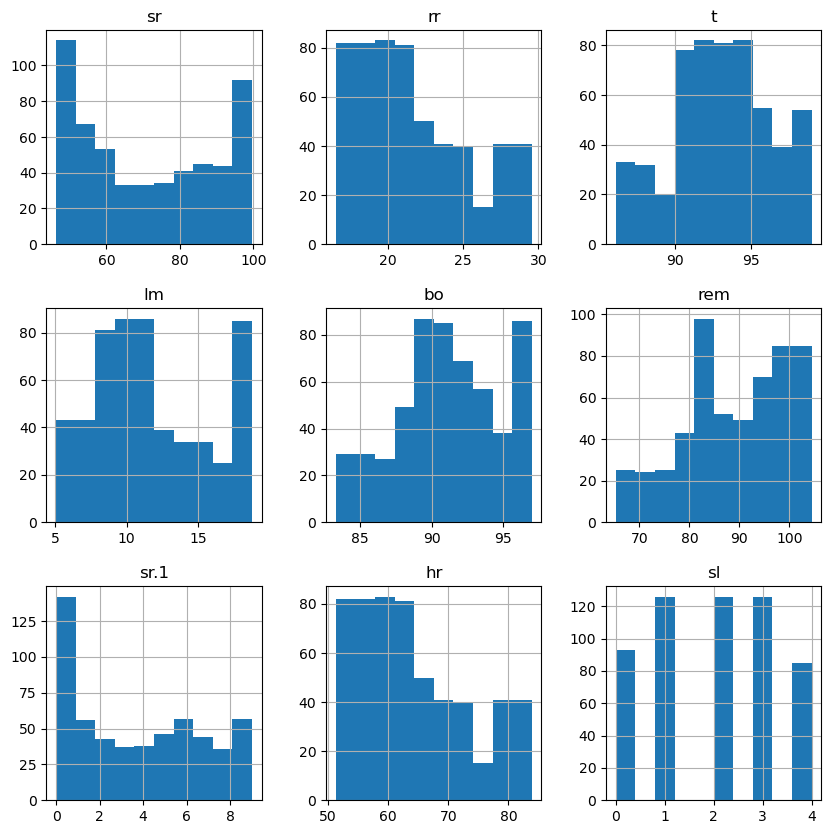

In [84]:
s_df_1.hist(figsize=(10, 10))

sr에 대해 확인

<Axes: >

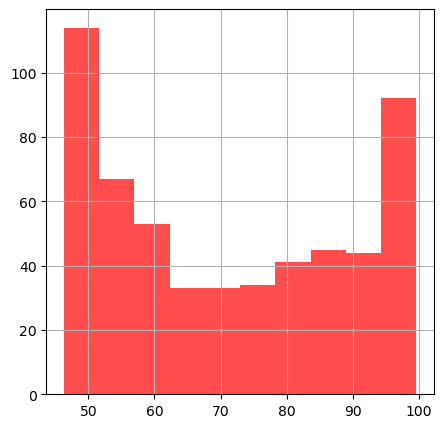

In [92]:
import numpy as np

#s_df_1.sr.hist(figsize=(5, 5))
s_df_1.sr.hist(figsize= (5, 5), alpha=0.7, color='red')

In [102]:
s_df_1.sr.sort_values(ascending=False)

177    99.552
457    99.520
491    99.488
381    99.456
430    99.424
        ...  
450    46.480
458    46.440
456    46.400
173    46.360
474    46.320
Name: sr, Length: 556, dtype: float64

In [116]:
s_df_1[s_df_1.sr > 95]

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
33,98.528,28.528,88.16,18.264,85.792,103.16,0.0,81.32,4
34,98.720,28.720,88.40,18.360,86.080,103.40,0.0,81.80,4
40,98.912,28.912,88.64,18.456,86.368,103.64,0.0,82.28,4
42,97.664,27.664,87.08,17.832,84.496,102.08,0.0,79.16,4
50,97.536,27.536,86.92,17.768,84.304,101.92,0.0,78.84,4
...,...,...,...,...,...,...,...,...,...
533,97.760,27.760,87.20,17.880,84.640,102.20,0.0,79.40,4
538,98.592,28.592,88.24,18.296,85.888,103.24,0.0,81.48,4
546,97.024,27.024,86.28,17.512,83.536,101.28,0.0,77.56,4
549,98.144,28.144,87.68,18.072,85.216,102.68,0.0,80.36,4


데이터 훈련을 한 다음에 자를지 말지를 판단해야함!!  
단순히 hist만 먼저 뽑아서 판단하면 안됨!  
따라서 아래 그래프에서 튀어나와있는 수치의 데이터를 먼저 제거하는 것은 잘못된 방법임!

In [119]:
sr0 = s_df_1[s_df_1.sr < 52].sample(60, random_state=124)
sr1 = s_df_1[s_df_1.sr > 95].sample(60, random_state=124)
con1 = s_df_1.sr >= 52
con2 = s_df_1.sr <= 95
cond = con1 & con2
sr = s_df_1[cond]
s_df_1 = pd.concat([sr0, sr1, sr]).reset_index(drop=True)
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,48.56,17.424,98.136,6.848,96.424,74.24,8.424,53.56,0
1,48.36,17.344,98.016,6.688,96.344,73.44,8.344,53.36,0
2,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
3,46.68,16.672,97.008,5.344,95.672,66.72,7.672,51.68,0
4,47.36,16.944,97.416,5.888,95.944,69.44,7.944,52.36,0
...,...,...,...,...,...,...,...,...,...
468,65.44,20.544,92.544,10.544,90.544,87.72,2.816,61.36,2
469,58.80,19.760,95.760,9.760,94.640,84.40,6.760,59.40,1
470,69.60,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
471,58.64,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


<Axes: >

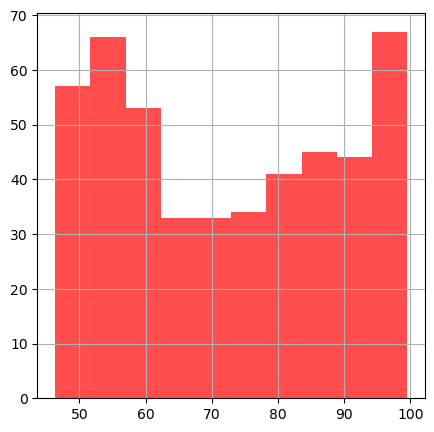

In [120]:
import numpy as np

#s_df_1.sr.hist(figsize=(5, 5))
s_df_1.sr.hist(figsize= (5, 5), alpha=0.7, color='red')

<Axes: >

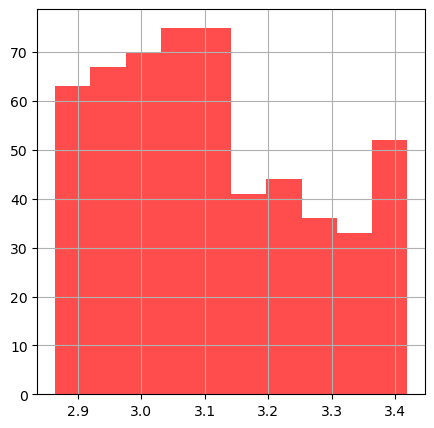

In [105]:
import numpy as np

#s_df_1.rr.hist(figsize=(5, 5))
np.log1p(s_df_1.rr).hist(figsize= (5, 5), alpha=0.7, color='red')

rr은 log로 치환한 값을 이용

<Axes: >

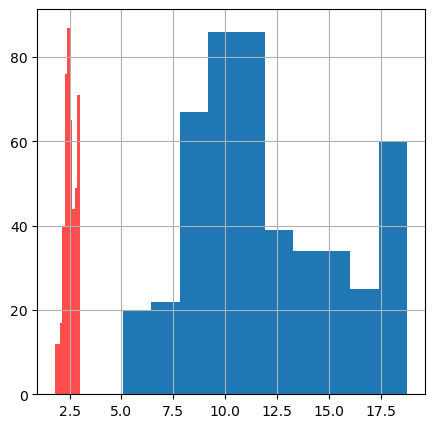

In [121]:
import numpy as np

s_df_1.lm.hist(figsize=(5, 5))
np.log1p(s_df_1.lm).hist(figsize= (5, 5), alpha=0.7, color='red')

lm은 원본 그대로

<Axes: >

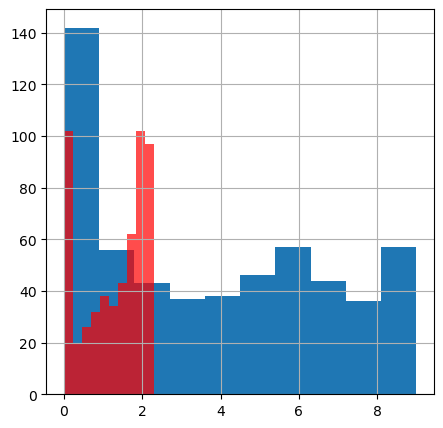

In [110]:
import numpy as np

s_df_1['sr.1'].hist(figsize=(5, 5))
#np.log1p(s_df_1['sr.1']).hist(figsize= (5, 5), alpha=0.7, color='red')

In [122]:
s_df_1[s_df_1['sr.1'] < 1]

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
60,98.592,28.592,88.240,18.296,85.888,103.24,0.000,81.48,4
61,98.848,28.848,88.560,18.424,86.272,103.56,0.000,82.12,4
62,99.072,29.072,88.840,18.536,86.608,103.84,0.000,82.68,4
63,99.424,29.424,89.280,18.712,87.136,104.28,0.000,83.56,4
64,98.528,28.528,88.160,18.264,85.792,103.16,0.000,81.32,4
...,...,...,...,...,...,...,...,...,...
436,85.520,23.472,90.736,13.840,88.736,96.84,0.736,68.68,3
439,86.000,23.600,90.800,14.000,88.800,97.00,0.800,69.00,3
444,84.560,23.216,90.608,13.520,88.608,96.52,0.608,68.04,3
446,83.000,22.800,90.400,13.000,88.400,96.00,0.400,67.00,3


In [123]:
sr1_0 = s_df_1[s_df_1['sr.1'] < 1].sample(20, random_state=124)
sr1_1 = s_df_1[s_df_1['sr.1'] >= 1]
s_df_1 = pd.concat([sr1_0, sr1_1]).reset_index(drop=True)
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,97.376,27.376,86.720,17.688,84.064,101.72,0.000,78.44,4
1,99.008,29.008,88.760,18.504,86.512,103.76,0.000,82.52,4
2,98.080,28.080,87.600,18.040,85.120,102.60,0.000,80.20,4
3,81.560,22.416,90.208,12.520,88.208,95.52,0.208,66.04,3
4,98.368,28.368,87.960,18.184,85.552,102.96,0.000,80.92,4
...,...,...,...,...,...,...,...,...,...
365,65.440,20.544,92.544,10.544,90.544,87.72,2.816,61.36,2
366,58.800,19.760,95.760,9.760,94.640,84.40,6.760,59.40,1
367,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
368,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


<Axes: >

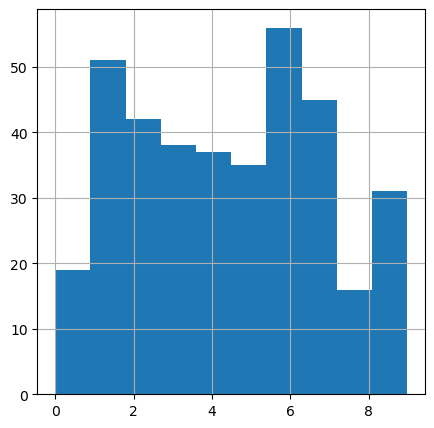

In [124]:
import numpy as np

s_df_1['sr.1'].hist(figsize=(5, 5))
#np.log1p(s_df_1['sr.1']).hist(figsize= (5, 5), alpha=0.7, color='red')

sr.1은 샘플링한 값으로 진행

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

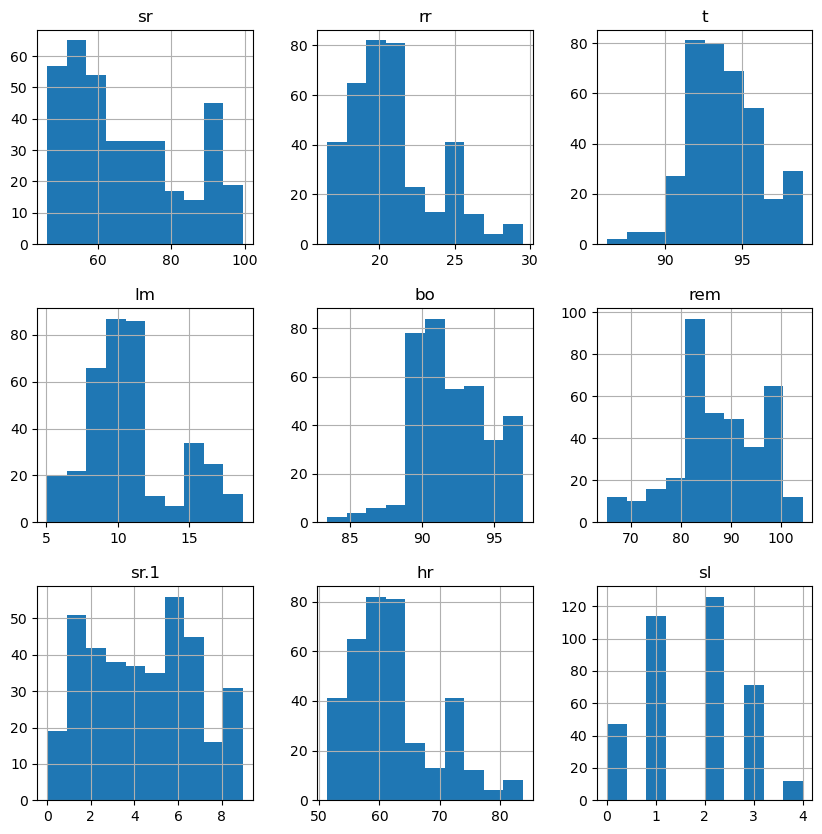

In [125]:
s_df_1.hist(figsize=(10,10))

In [126]:
s_df_1.sl.value_counts()

sl
2    126
1    114
3     71
0     47
4     12
Name: count, dtype: int64

In [127]:
sl3 = s_df_1[s_df_1.sl == 3].sample(12, random_state=124)
sl1 = s_df_1[s_df_1.sl == 1].sample(12, random_state=124)
sl2 = s_df_1[s_df_1.sl == 2].sample(12, random_state=124)
sl0 = s_df_1[s_df_1.sl == 0].sample(12, random_state=124)
sl4 = s_df_1[s_df_1.sl == 4]

s_df_1 = pd.concat([sl3, sl1, sl2, sl0, sl4]).reset_index(drop=True)

In [128]:
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,87.560,24.016,91.008,14.520,89.008,97.52,1.008,70.04,3
1,91.160,24.976,91.488,15.720,89.488,98.72,1.488,72.44,3
2,93.320,25.552,91.776,16.440,89.776,99.44,1.776,73.88,3
3,89.360,24.496,91.248,15.120,89.248,98.12,1.248,71.24,3
4,82.520,22.672,90.336,12.840,88.336,95.84,0.336,66.68,3
5,90.560,24.816,91.408,15.520,89.408,98.52,1.408,72.04,3
6,89.120,24.432,91.216,15.040,89.216,98.04,1.216,71.08,3
7,88.160,24.176,91.088,14.720,89.088,97.72,1.088,70.44,3
8,92.000,25.200,91.600,16.000,89.600,99.00,1.600,73.00,3
9,92.960,25.456,91.728,16.320,89.728,99.32,1.728,73.64,3


각 feature별 이상치들 제거후에 타겟데이터 언더샘플링 후 훈련 진행

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

features, targets = s_df_1.iloc[:, :-1], s_df_1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)


dtc_parameters = {'max_depth':[20, 22, 24] , 'min_samples_split': [22,24,26]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameters = {'knn__n_neighbors' : [9, 11, 13, 15, 17]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()


g_dtc = GridSearchCV(dtc, param_grid = dtc_parameters, cv=5, refit= True, return_train_score= True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit= True, return_train_score= True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit= True, return_train_score= True)



In [155]:
g_dtc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 22, 24],
                         'min_samples_split': [22, 24, 26]},
             return_train_score=True)

In [133]:
g_svc.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [158]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [9, 11, 13, 15, 17]},
             return_train_score=True)

In [156]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 20, 'min_samples_split': 22}",0.648889,1
1,"{'max_depth': 20, 'min_samples_split': 24}",0.560000,6
2,"{'max_depth': 20, 'min_samples_split': 26}",0.560000,6
3,"{'max_depth': 22, 'min_samples_split': 22}",0.626667,2
4,"{'max_depth': 22, 'min_samples_split': 24}",0.560000,6
5,"{'max_depth': 22, 'min_samples_split': 26}",0.582222,4
6,"{'max_depth': 24, 'min_samples_split': 22}",0.626667,2
7,"{'max_depth': 24, 'min_samples_split': 24}",0.562222,5
8,"{'max_depth': 24, 'min_samples_split': 26}",0.540000,9


In [136]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.671111,41
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.671111,41
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.671111,41
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.671111,41
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.671111,41
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",1.000000,1
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",1.000000,1
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.957778,34
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",1.000000,1


In [148]:
print(svc_result_df['params'][37])

{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [149]:
from sklearn.preprocessing import StandardScaler

svc = SVC(C=1, kernel='rbf', gamma=0.001, probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=0.001, probability=True))])

In [159]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])

display(knn_result_df)

{'knn__n_neighbors': 15}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 9},1.000000,1
1,{'knn__n_neighbors': 11},1.000000,1
2,{'knn__n_neighbors': 13},1.000000,1
3,{'knn__n_neighbors': 15},0.835556,4
4,{'knn__n_neighbors': 17},0.746667,5


In [160]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [170]:
from sklearn.ensemble import VotingClassifier

#vc = VotingClassifier(estimators=[('dtc', dtc), ('svc', svc_pipe), ('knn', knn_pipe)], voting='hard', n_jobs=-1)
# 오차 행렬
# [[2 0 0 0 0]
#  [0 3 0 0 0]
#  [0 0 2 0 0]
#  [0 0 0 2 0]
#  [0 0 0 0 3]]
# 정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
vc = VotingClassifier(estimators=[('dtc', dtc), ('svc', svc_pipe), ('knn', knn_pipe)], voting='soft', n_jobs=-1)
# 오차 행렬
# [[2 0 0 0 0]
#  [0 3 0 0 0]
#  [0 0 2 0 0]
#  [0 0 0 2 0]
#  [0 0 0 0 3]]
# 정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000

In [171]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=15))]))],
                 n_jobs=-1, voting='soft')

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

In [172]:
prediction = vc.predict(X_test)

오차 행렬
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


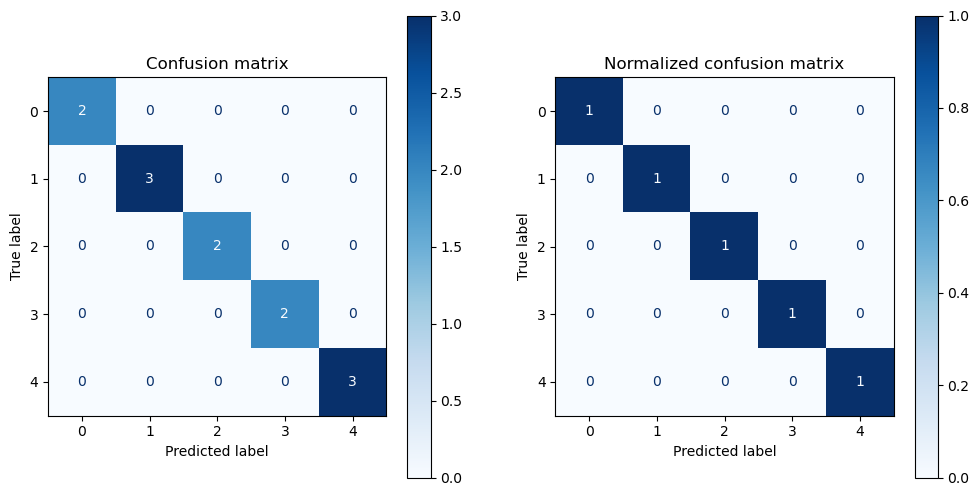

In [173]:
get_evaluation(y_test, prediction, vc, X_test)

feature 이상치 제거하지 않고 그대로 진행

In [174]:
import pandas as pd

s_df = pd.read_csv('./datasets/stress_in_sleep.csv')
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [175]:
std_s_df = s_df.copy()

In [176]:
from sklearn.preprocessing import StandardScaler

features = s_df.iloc[:, :-1]

std = StandardScaler()
std_features=  std.fit_transform(features)
std_s_df = pd.DataFrame(std_features, columns = features.columns)
std_s_df['target'] = s_df.sl
std_s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,target
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
625,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
626,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
627,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
628,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [177]:
columns = ['sr', 'lm', 'hr','rr','rem','bo','t','sr.1']

for column in columns:
    std_s_df.drop(
        std_s_df[~std_s_df[column].between(-1.96, 1.96)].index,
        axis=0,
        inplace=True
    )

In [178]:
columns = ['sr', 'lm', 'hr','rr','rem','bo','t','sr.1']

for column in columns:
    print(f'{column}: {std_s_df[~std_s_df[column].between(-1.96, 1.96)].shape[0]}건')

sr: 0건
lm: 0건
hr: 0건
rr: 0건
rem: 0건
bo: 0건
t: 0건
sr.1: 0건


In [179]:
s_df_1 = s_df.copy()

In [180]:
s_df_1 = s_df_1.iloc[std_s_df.index].reset_index(drop=True)
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
551,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
552,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
553,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
554,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [181]:
s_df_1.sl.value_counts()

sl
3    126
1    126
2    126
0     93
4     85
Name: count, dtype: int64

In [182]:
s3 = s_df_1[s_df_1.sl == 3].sample(85, random_state=124)
s1 = s_df_1[s_df_1.sl == 1].sample(85, random_state=124)
s2 = s_df_1[s_df_1.sl == 2].sample(85, random_state=124)
s0 = s_df_1[s_df_1.sl == 0].sample(85, random_state=124)
s4 = s_df_1[s_df_1.sl == 4]

s_df_1 = pd.concat([s3, s1, s2, s0, s4]).reset_index(drop=True)
s_df_1

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,80.840,22.224,90.112,12.280,88.112,95.28,0.112,65.56,3
1,91.400,25.040,91.520,15.800,89.520,98.80,1.520,72.60,3
2,81.320,22.352,90.176,12.440,88.176,95.44,0.176,65.88,3
3,83.360,22.896,90.448,13.120,88.448,96.12,0.448,67.24,3
4,80.720,22.192,90.096,12.240,88.096,95.24,0.096,65.48,3
...,...,...,...,...,...,...,...,...,...
420,97.760,27.760,87.200,17.880,84.640,102.20,0.000,79.40,4
421,98.592,28.592,88.240,18.296,85.888,103.24,0.000,81.48,4
422,97.024,27.024,86.280,17.512,83.536,101.28,0.000,77.56,4
423,98.144,28.144,87.680,18.072,85.216,102.68,0.000,80.36,4


array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

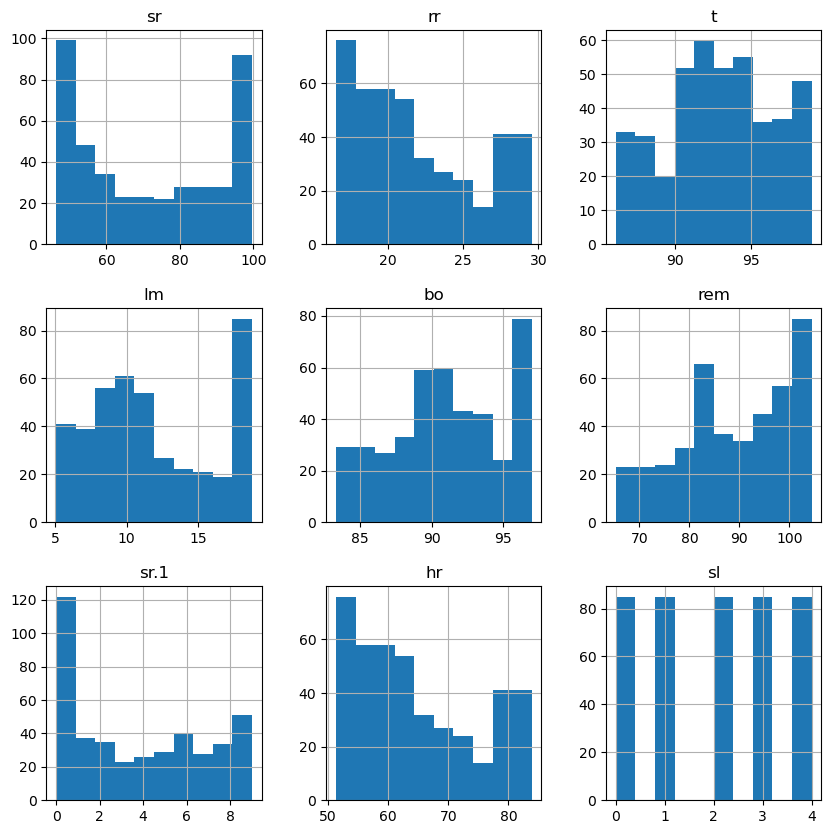

In [183]:
s_df_1.hist(figsize=(10,10))

먼저 그냥 훈련부터 진행

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

features, targets = s_df_1.iloc[:, :-1], s_df_1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)


dtc_parameters = {'max_depth':[3,4,5] , 'min_samples_split': [6,7,8,9]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameters = {'knn__n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()


g_dtc = GridSearchCV(dtc, param_grid = dtc_parameters, cv=5, refit= True, return_train_score= True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit= True, return_train_score= True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit= True, return_train_score= True)



In [196]:
g_dtc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [6, 7, 8, 9]},
             return_train_score=True)

In [201]:
g_svc.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [226]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23]},
             return_train_score=True)

In [197]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_split': 6}",0.914706,9
1,"{'max_depth': 3, 'min_samples_split': 7}",0.911765,11
2,"{'max_depth': 3, 'min_samples_split': 8}",0.908824,12
3,"{'max_depth': 3, 'min_samples_split': 9}",0.914706,9
4,"{'max_depth': 4, 'min_samples_split': 6}",0.994118,2
5,"{'max_depth': 4, 'min_samples_split': 7}",0.991176,6
6,"{'max_depth': 4, 'min_samples_split': 8}",0.991176,6
7,"{'max_depth': 4, 'min_samples_split': 9}",0.994118,2
8,"{'max_depth': 5, 'min_samples_split': 6}",0.991176,6
9,"{'max_depth': 5, 'min_samples_split': 7}",0.997059,1


In [207]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=8)

In [202]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.547059,54
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.382353,61
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.547059,54
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.382353,61
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.547059,54
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",1.000000,1
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",1.000000,1
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",1.000000,1
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",1.000000,1


In [203]:
svc_result_df.rank_test_score.value_counts()

rank_test_score
1     50
61    12
54     6
52     2
60     1
51     1
Name: count, dtype: int64

In [205]:
svc_result_df[svc_result_df.rank_test_score==51]

,params,mean_test_score,rank_test_score
35,"{'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...",0.764706,51


In [206]:
print(svc_result_df['params'][35])

{'svc__C': 0.1, 'svc__gamma': 100, 'svc__kernel': 'rbf'}


In [208]:
from sklearn.preprocessing import StandardScaler

svc = SVC(C=0.1,gamma=100, kernel='rbf', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma=100, probability=True))])

In [227]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
#print(knn_result_df['params'].iloc[3])

display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},1.0,1
1,{'knn__n_neighbors': 5},1.0,1
2,{'knn__n_neighbors': 7},1.0,1
3,{'knn__n_neighbors': 9},1.0,1
4,{'knn__n_neighbors': 11},1.0,1
5,{'knn__n_neighbors': 13},1.0,1
6,{'knn__n_neighbors': 15},1.0,1
7,{'knn__n_neighbors': 17},1.0,1
8,{'knn__n_neighbors': 19},1.0,1
9,{'knn__n_neighbors': 21},1.0,1


knn은 1로 계속해서 나타남..

In [228]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [229]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dtc', dtc), ('svc', svc_pipe), ('knn', knn_pipe)], voting='hard', n_jobs=-1)

In [230]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 n_jobs=-1)

In [231]:
prediction = vc.predict(X_test)

오차 행렬
[[17  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


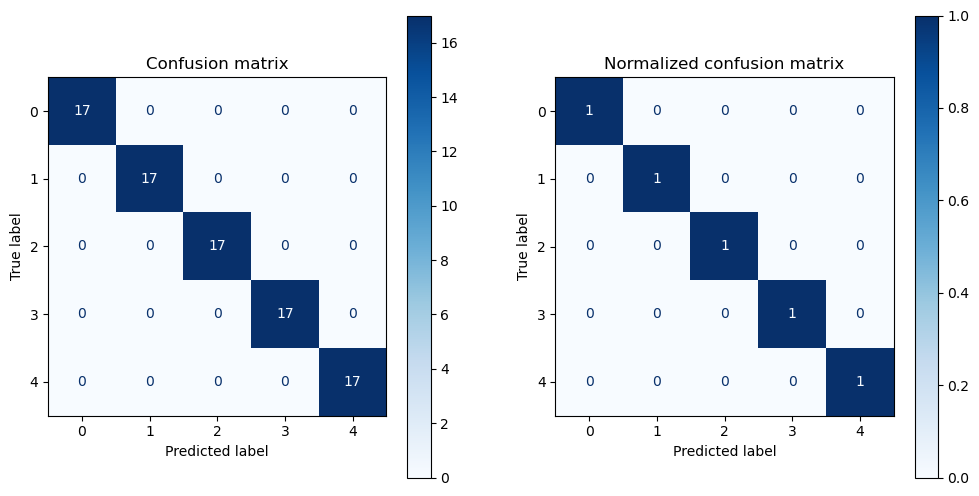

In [232]:
get_evaluation(y_test, prediction, vc, X_test)

배깅

In [239]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [5,6,7]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = s_df_1.iloc[:, :-1], s_df_1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid =parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [5, 6, 7]})

In [240]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
#print(result_df['params'].iloc[3])

display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 5}",0.997059,1
1,"{'max_depth': 1, 'min_samples_split': 6}",0.994118,7
2,"{'max_depth': 1, 'min_samples_split': 7}",0.994118,7
3,"{'max_depth': 2, 'min_samples_split': 5}",0.994118,7
4,"{'max_depth': 2, 'min_samples_split': 6}",0.994118,7
5,"{'max_depth': 2, 'min_samples_split': 7}",0.994118,7
6,"{'max_depth': 3, 'min_samples_split': 5}",0.991176,14
7,"{'max_depth': 3, 'min_samples_split': 6}",0.994118,7
8,"{'max_depth': 3, 'min_samples_split': 7}",0.994118,7
9,"{'max_depth': 4, 'min_samples_split': 5}",0.997059,1


In [241]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

오차 행렬
[[17  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


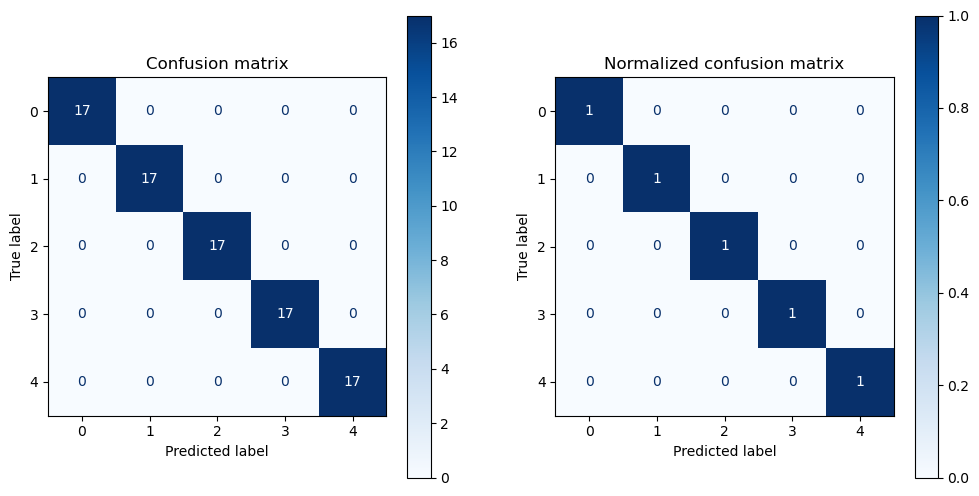

In [243]:
get_evaluation(y_test, prediction, rfc, X_test)

피처별 돌출되는 값들을 제거하고 진행한 오차행렬과,  
제거하지 않고, 타겟데이터에 맞춰서 언더샘플링한 결과를 보팅방식과 배깅방식 둘다 진행한 결과  
정확도 1.0이 나왔다.  
- 과적합을 해소할 방법을 더 찾아봐야될 것 같다.

-----------------------

### Boosting 기법 사용

In [1]:
import pandas as pd

s_df = pd.read_csv('./datasets/stress_in_sleep.csv')
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [2]:
s_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

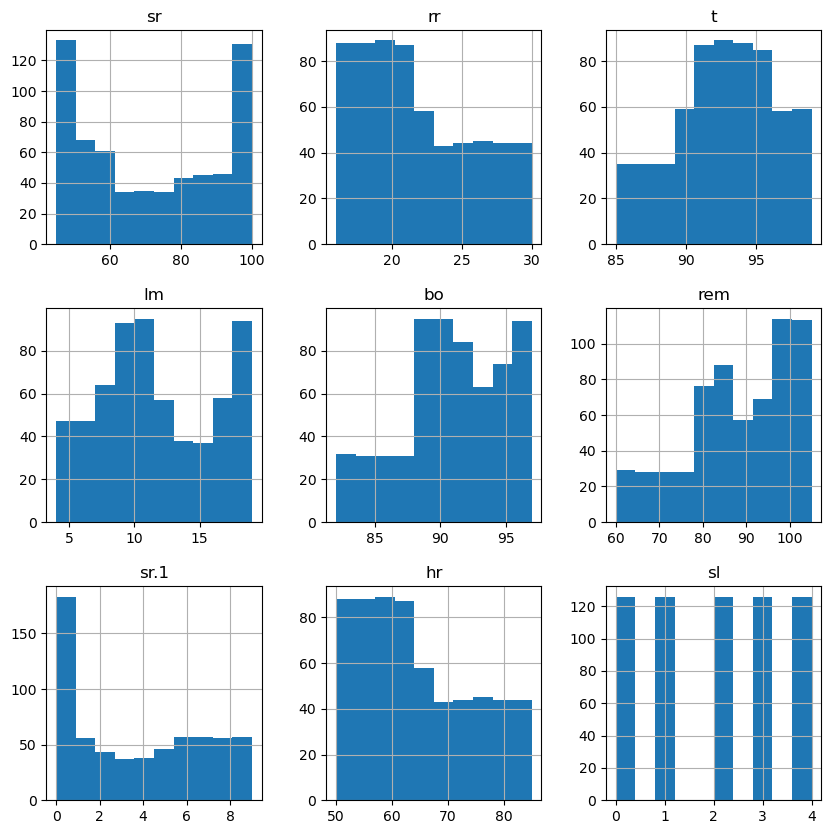

In [4]:
s_df.hist(figsize=(10,10))

<Axes: >

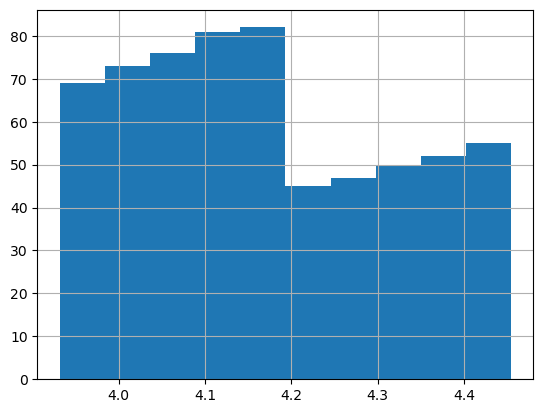

In [8]:
import numpy as np

np.log1p(s_df.hr).hist()

In [12]:
s_df.corr()['sl'].sort_values(ascending=False).iloc[1:]

sr      0.975322
lm      0.971071
hr      0.963516
rr      0.963516
rem     0.951988
bo     -0.961092
t      -0.962354
sr.1   -0.973036
Name: sl, dtype: float64

In [14]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = s_df.iloc[:, :-1], s_df.sl

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [15]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
#print(result_df['params'].iloc[3])

display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.986111,4
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.986111,4
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.986111,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.988095,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.986111,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.986111,4
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.986111,4
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.986111,4
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.986111,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.986111,4


In [16]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

오차 행렬
[[23  2  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  1 24  0]
 [ 0  0  0  0 26]]
정확도: 0.9762, 정밀도: 0.9775, 재현율: 0.9760, F1: 0.9760
################################################################################


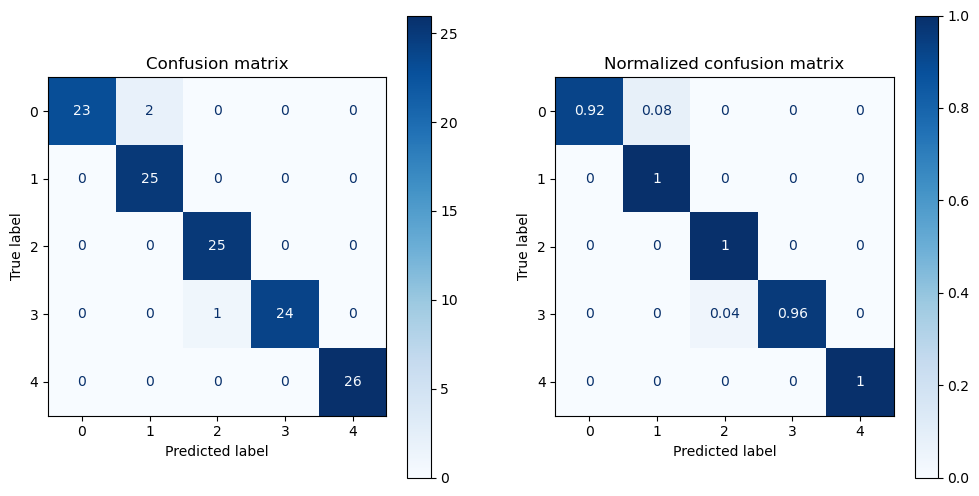

In [18]:
get_evaluation(y_test, prediction, gbc, X_test)